In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle
import numpy as np
import os
import io
import imageio

In [2]:
date = "20230907"
nlct_path = "nlct_data/"+date+"/"

### Plot image

In [3]:
filename = 'goes_e_ntlc_'+date[0:4]+'_'+date[4:6]+'_'+date[6:8]+'_00H_00M'

file = open(nlct_path+filename, 'rb')
BTD = pickle.load(file)
file.close()

In [4]:
#---Northeast US
# min_lon = -83
# min_lat = 26
# max_lon = -51
# max_lat = 50

#---Chilean Coast
# min_lon = -95
# min_lat = -37
# max_lon = -65
# max_lat = -10

#--- Oaxaca
# min_lon = -109
# min_lat = 10
# max_lon = -81
# max_lat = 24

#---Georges Bank
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 42.5

In [5]:
BTD_masked = BTD[0].where(BTD[0] >= 0, 0)

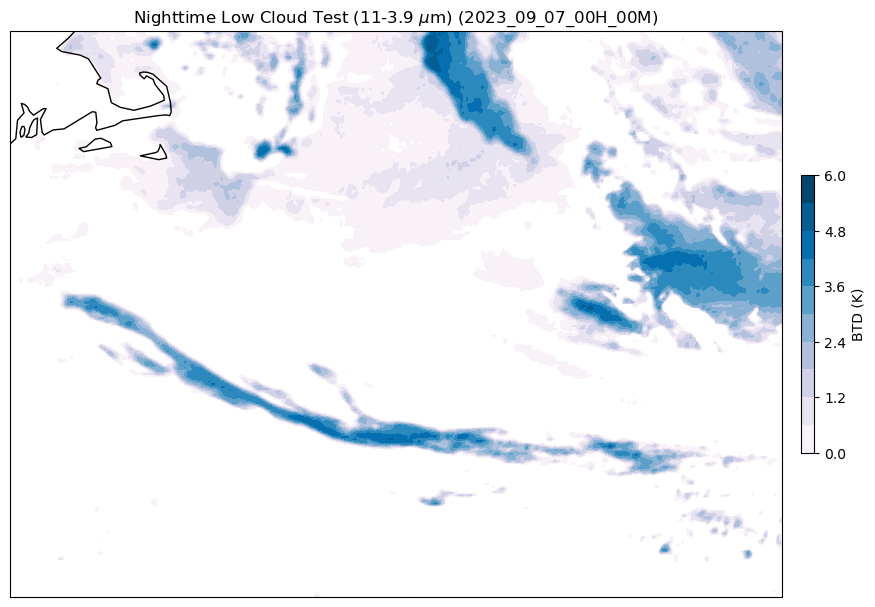

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.PuBu
levels = np.linspace(0, 6, 11)

ax.set_extent([min_lon, max_lon, min_lat, max_lat])
c=ax.contourf(BTD.lon, BTD.lat, BTD[0], cmap=cmap, extend='neither', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Nighttime Low Cloud Test (11-3.9 $\mu$m) ('+filename[12:]+')')
clb.set_label('BTD (K)')

ax.coastlines(resolution='50m', color='black', linewidth=1)

### Create Animation

In [7]:
def create_frame(filename):
    
    #---Open Band 07 file
    file = open(nlct_path+filename, 'rb')
    BT = pickle.load(file)
    file.close()
    
    #---Crop image to the region of interest
    BT_c = BT.where((BT.lat>min_lat) & (BT.lat<max_lat) & (BT.lon>min_lon) & (BT.lon<max_lon))
    BT_c = BT_c.dropna(dim="y", how="all")
    BT_c = BT_c.dropna(dim="x", how="all")
    
    #---Set positive values to zero
    BTD_c = BT_c[0].where(BT_c[0] >= 0, 0)
    
    #---Create figure for timestamp
    projection=ccrs.PlateCarree()
    fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
    cmap = plt.cm.PuBu
    
    c=ax.contourf(BT_c.lon, BT_c.lat, BT_c[0], cmap=cmap, levels=levels)
    clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
    datetime = filename[12:]
    ax.set_title('ABI NLCT $\mu$m ('+datetime+')', fontsize=30)
    clb.set_label('BTD (K)')
    ax.add_feature(cfeature.STATES)

    # Save the current figure to a BytesIO buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)


    # Read the BytesIO buffer and return as an image
    frame = imageio.imread(buf)

    # Clear the current figure to avoid overlapping plots
    plt.clf()

    return frame

In [8]:
file_list = os.listdir(nlct_path)
file_list.sort()

anim_list = []

for filename in file_list:
        anim_list += [filename]

In [9]:
anim_list

['goes_e_ntlc_2023_09_07_00H_00M',
 'goes_e_ntlc_2023_09_07_00H_10M',
 'goes_e_ntlc_2023_09_07_00H_20M',
 'goes_e_ntlc_2023_09_07_00H_30M',
 'goes_e_ntlc_2023_09_07_00H_40M',
 'goes_e_ntlc_2023_09_07_00H_50M',
 'goes_e_ntlc_2023_09_07_01H_00M',
 'goes_e_ntlc_2023_09_07_01H_10M',
 'goes_e_ntlc_2023_09_07_01H_20M',
 'goes_e_ntlc_2023_09_07_01H_30M',
 'goes_e_ntlc_2023_09_07_01H_40M',
 'goes_e_ntlc_2023_09_07_01H_50M',
 'goes_e_ntlc_2023_09_07_02H_00M',
 'goes_e_ntlc_2023_09_07_02H_10M',
 'goes_e_ntlc_2023_09_07_02H_20M',
 'goes_e_ntlc_2023_09_07_02H_30M',
 'goes_e_ntlc_2023_09_07_02H_40M',
 'goes_e_ntlc_2023_09_07_02H_50M',
 'goes_e_ntlc_2023_09_07_03H_00M',
 'goes_e_ntlc_2023_09_07_03H_10M',
 'goes_e_ntlc_2023_09_07_03H_20M',
 'goes_e_ntlc_2023_09_07_03H_30M',
 'goes_e_ntlc_2023_09_07_03H_40M',
 'goes_e_ntlc_2023_09_07_03H_50M']

In [10]:
frames = []
for filename in anim_list:
    frame = create_frame(filename)
    frames.append(frame)

/tmp/ipykernel_20910/3151416207.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_20910/3151416207.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_20910/3151416207.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_20910/3151416207.py:37: Depreca

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [11]:
imageio.mimsave('nlct_'+nlct_path[10:18]+'.gif', frames, loop=0, duration=5)